In [1]:
import tensorflow as tf

import os
import time

from matplotlib import pyplot as plt
from IPython import display
import pickle

In [2]:
import numpy as np
import nrrd
import os
from tqdm import tqdm
# import data 
path = 'C:/Users/hp/Desktop/pfe_sdbd/abdelmotalib/abdelmotalib/MRA/'
image_reel = {}
image_segment = {}

path1 = os.path.join(path,'x')
for i in tqdm(os.listdir(path1)):
    image_reel[i] = nrrd.read(os.path.join(path1, i))
path2 = os.path.join(path,'y')
for i in tqdm(os.listdir(path2)):
    image_segment[i] = nrrd.read(os.path.join(path2, i))

100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


In [9]:
image_segment2 = {'0_label.nrrd':image_segment['0_label.nrrd'],
                  '1_label.nrrd':image_segment['1_label.nrrd'],
                  '10_label.nrrd':image_segment['10_label.nrrd'],
                  '11_label.nrrd':image_segment['11_label.nrrd'] ,
                  '12_label.nrrd':image_segment['12_label.nrrd'] }



for key in image_reel.keys():
    print(key, image_reel[key][0].shape)
print('##############')
for key in image_segment2.keys():
    print(key, image_segment2[key][0].shape)

0.nrrd (696, 768, 184)
1.nrrd (560, 560, 140)
10.nrrd (512, 512, 136)
11.nrrd (1008, 1008, 74)
12.nrrd (1008, 1008, 74)
##############
0_label.nrrd (696, 768, 184)
1_label.nrrd (560, 560, 140)
10_label.nrrd (512, 512, 136)
11_label.nrrd (1008, 1008, 74)
12_label.nrrd (1008, 1008, 74)


In [10]:
all_image_reel = []
all_image_segment = []
for i in image_reel.keys():
    for j in range(image_reel[i][0].shape[2]):
        all_image_reel.append(image_reel[i][0][:,:,j])

for i in image_segment2.keys():
    for j in range(image_segment2[i][0].shape[2]):
        all_image_segment.append(image_segment2[i][0][:,:,j])

In [11]:
a = all_image_segment[500]
j = 0
for i in range(len(all_image_segment)):
    if(all_image_segment[i].shape != all_image_reel[i].shape ):
        j = j+1
        print(all_image_segment[i].shape, all_image_reel[i].shape, i)
print(j)

0


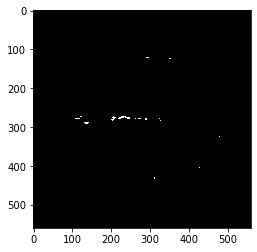

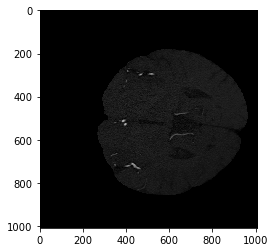

In [11]:
plt.imshow(all_image_segment[604], cmap='gray')
plt.show()
plt.imshow(all_image_reel[604], cmap='gray')
plt.show()

In [12]:
import pickle
all_data = {}
file = 'ALL_DATA'
outfile = open(file,'wb')
all_data['all_image_reel'] = all_image_reel
all_data['all_image_segment'] = all_image_segment 

pickle.dump(all_data,outfile)
outfile.close()